In [6]:
%load_ext autoreload
%autoreload 2
from dataset import iterable_dataset, vae_feature_dataset
from models.music_generation_gru import MusicGRU
import os
from utils import training_rnn, data_reading
import torch
from torch.utils.data import DataLoader
import pickle
import matplotlib.pyplot as plt
from utils import data_reading, music_generation
from models import feature_prediction_gru
from dataset import iterable_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
FEATURE_DIRPATH = "./saved_model_and_data/transformed_features/guitar"
TRAIN_SPLIT = 0.95
SEQ_LEN = 48
RESOLUTION = 12
TRACK_ORDER = ["Guitar", "Piano"]
FILES_TO_READ = 99999
BATCH_SIZE = 64
LATENT_SIZE = 513
HIDDEN_SIZE = 512
N_LAYER = 3
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
LR_LAMBDA = 1
LR = 0.0001
ALPHA = 0
AUTO_SAVE = False
SAVE_ON_EPOCH = 1

In [8]:
all_feature_files = data_reading.read_all_npys(FEATURE_DIRPATH, True)

In [9]:
train_len = round(len(all_feature_files)*TRAIN_SPLIT)
train_files_list = all_feature_files[:train_len]
test_files_list = all_feature_files[train_len:]

In [10]:
train_dataset = vae_feature_dataset.IterableSongDataset(train_files_list, SEQ_LEN, TRACK_ORDER, FILES_TO_READ, RESOLUTION)
test_dataset = vae_feature_dataset.IterableSongDataset(test_files_list, SEQ_LEN, TRACK_ORDER, FILES_TO_READ, RESOLUTION)
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, drop_last=True)

In [11]:
model = feature_prediction_gru.FeaturePredictionGRU(["Guitar"], LATENT_SIZE, HIDDEN_SIZE, BATCH_SIZE, N_LAYER, DEVICE).to(DEVICE)

In [12]:
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda = lambda epoch: LR_LAMBDA ** epoch)
criterion = torch.nn.MSELoss()

In [13]:
EPOCH = 80
train_losses, test_losses = training_rnn.training_rnn(model, optimizer, scheduler, criterion, train_loader, test_loader, EPOCH, DEVICE, BATCH_SIZE, 
                         ALPHA, AUTO_SAVE, SAVE_ON_EPOCH)

[0.0001]
start test
Epoch 1, Train Loss: 0.3095973809652122, Test Loss: 0.2867866465821862, Time: 2022-04-28 18:13:12.415945
[0.0001]
start test
Epoch 2, Train Loss: 0.2913856062072295, Test Loss: 0.28211864084005356, Time: 2022-04-28 18:13:49.249946
[0.0001]
start test
Epoch 3, Train Loss: 0.28765914892708816, Test Loss: 0.28005332313477993, Time: 2022-04-28 18:14:26.521360
[0.0001]
start test
Epoch 4, Train Loss: 0.2852999744131977, Test Loss: 0.278426056727767, Time: 2022-04-28 18:15:03.280969
[0.0001]
start test
Epoch 5, Train Loss: 0.2828099721191842, Test Loss: 0.2767918035387993, Time: 2022-04-28 18:15:40.363517
[0.0001]
start test
Epoch 6, Train Loss: 0.2799887506314266, Test Loss: 0.27479959186166525, Time: 2022-04-28 18:16:17.898119
[0.0001]
start test
Epoch 7, Train Loss: 0.2768827099583031, Test Loss: 0.27286858670413494, Time: 2022-04-28 18:16:55.364143
[0.0001]
start test
Epoch 8, Train Loss: 0.27358113721381, Test Loss: 0.27097300440073013, Time: 2022-04-28 18:17:33.1436

start test
Epoch 66, Train Loss: 0.159016382271125, Test Loss: 0.23824615217745304, Time: 2022-04-28 18:38:32.561671
[0.0001]
start test
Epoch 67, Train Loss: 0.15793913057832806, Test Loss: 0.2381483530625701, Time: 2022-04-28 18:38:41.594171
[0.0001]
start test
Epoch 68, Train Loss: 0.15702247242500753, Test Loss: 0.23837851826101542, Time: 2022-04-28 18:38:50.638671
[0.0001]
start test
Epoch 69, Train Loss: 0.15621757803967706, Test Loss: 0.23800157569348812, Time: 2022-04-28 18:38:59.950172
[0.0001]
start test
Epoch 70, Train Loss: 0.1555091291666031, Test Loss: 0.23939085472375154, Time: 2022-04-28 18:39:09.091171
[0.0001]
start test
Epoch 71, Train Loss: 0.1550874042060272, Test Loss: 0.2394424295052886, Time: 2022-04-28 18:39:18.009171
[0.0001]
start test
Epoch 72, Train Loss: 0.1549953494772867, Test Loss: 0.24057972338050604, Time: 2022-04-28 18:39:26.925171
[0.0001]
start test
Epoch 73, Train Loss: 0.155090981979429, Test Loss: 0.23878130689263344, Time: 2022-04-28 18:39:35.9

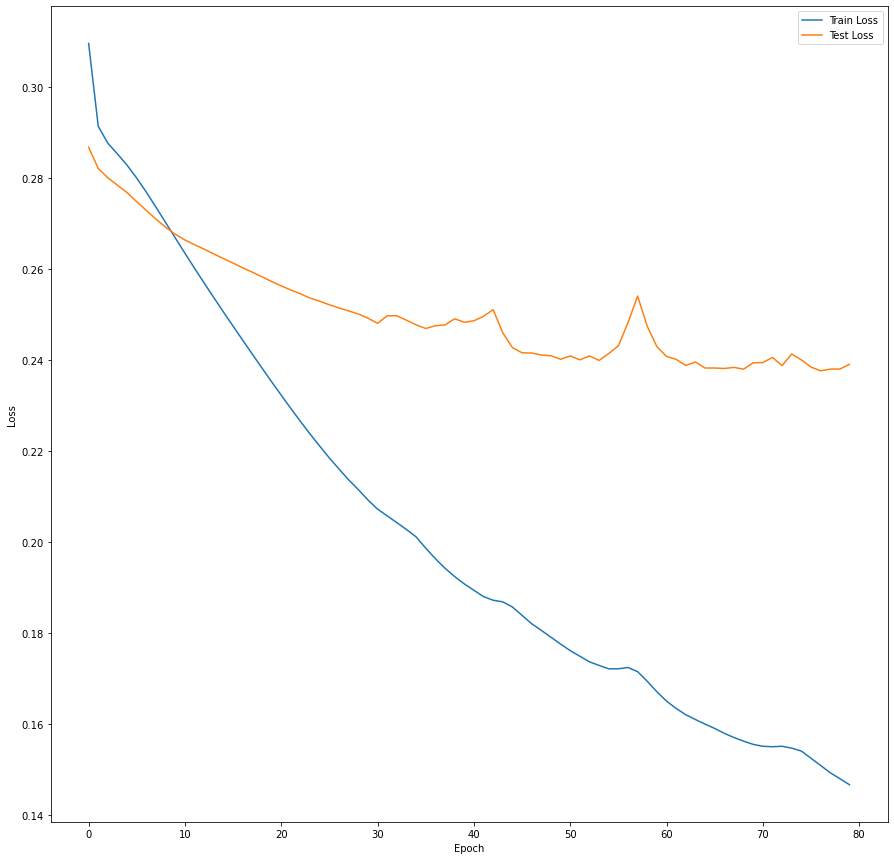

In [14]:
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [15]:
STRINGS_SAVE_PATH = f"./saved_model_and_data/learner/guitar_based_on_piano/guitar_learner_epoch{EPOCH}"
torch.save(model.state_dict(), STRINGS_SAVE_PATH) 